In [3]:
#-- Uncomment next line to install yfinance
# pip install yfinance

In [3]:
#-- Modules & Packages

import pandas as pd
import numpy as np
import json
import time 
import requests

import seaborn as sns
import matplotlib.pyplot as plt

import yfinance as yf 

from tqdm.notebook import trange, tqdm

In [29]:
#-- List of crypto of interest, selected the top 20 by market cap according to cryptoslate.com.
#-- This list excludes all the stablecoins.
#-- Name format for yahooFinance is "name-USD".

crypto_list = ['BTC-USD', 'ETH-USD','BNB-USD','XRP-USD', 'DOGE-USD','ADA-USD', 'SOL-USD', 'TRX-USD'
               ,'LTC-USD','MATIC-USD', 'DOT-USD','SHIB-USD','BCH-USD','DAI-USD','AVAX-USD','XLM-USD',
               'SNX-USD','UNI-USD','ATOM-USD','XMR-USD']

# ,'ETC-USD','OKB-USD','FIL-USD','ICP-USD','HBAR-USD','MNT-USD','LDO-USD','APT-USD'
#                ,'ARB-USD','CRO-USD','VET-USD','QNT-USD','NEAR-USD','MKR-USD','OP-USD','GRT-USD','AAVE-USD','ALGO-USD','AXS-USD','XDC-USD',
#                'STX-USD','SAND-USD','EGLD-USD','EOS-USD','IMX-USD', 'THETA-USD', 'BSV-USD','MANA-USD','RNDR-USD','APE-USD']
len(crypto_list)

20

<h5>Data Collecting.

In [1]:
#-- Collecting crypto ohlcv data from yfinance

data = yf.download(crypto_list, start = "2020-01-01", end = "2023-07-31")
data.columns
#-- Storing prices from Adj Close in a specific dataframe
prices_df = data['Adj Close']
#-- Many cryptos were not created until 2021-2022 so we replace the nan values by 0.
prices_df.fillna(0)

#-- Previewing the prices dataset
prices_df.tail(5)

NameError: name 'yf' is not defined

<h5> Correlation between assets with heatmap.

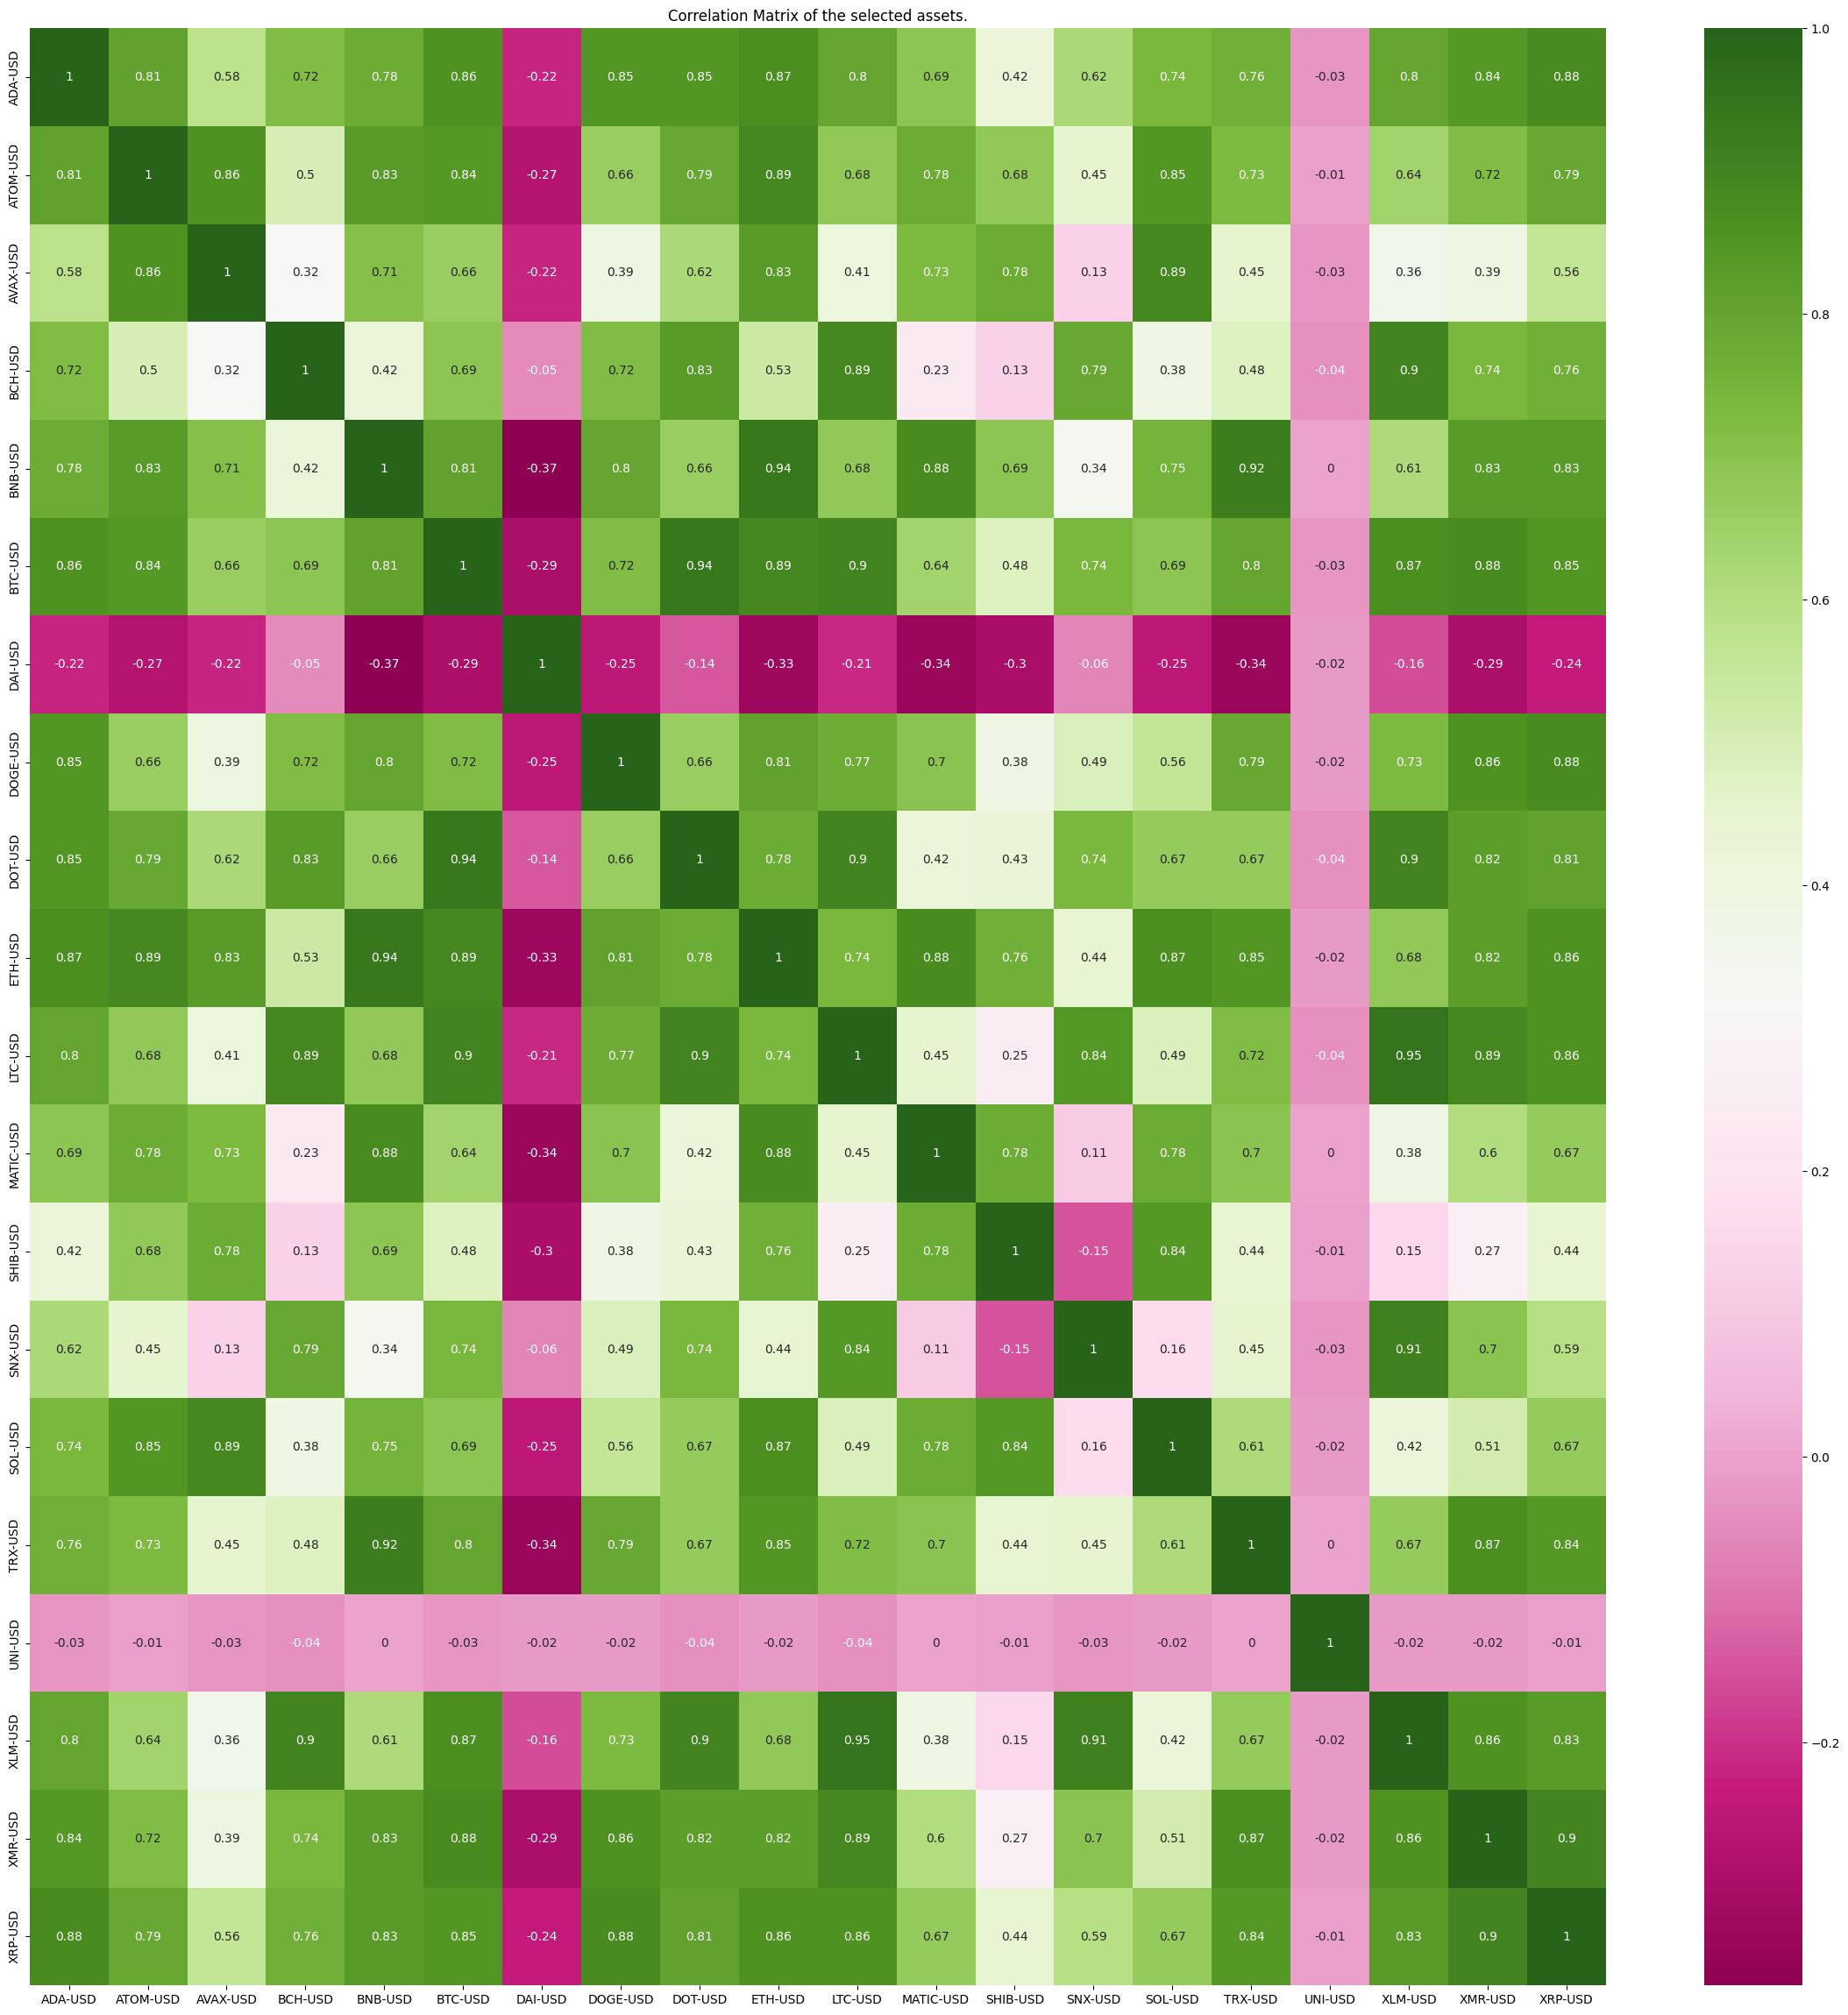

In [32]:
#-- Correlation matrix of all assets prices
correlation_matrix = np.round(prices_df.corr(),2)

#-- Heatmap of the correlation matrix
plt.figure(figsize=(29,29))
plt.title('Correlation Matrix of the selected assets.')
sns.heatmap(correlation_matrix, annot= True, cmap = 'PiYG')
plt.show()

<h7>The crypto prices heatmap indicates that a portfolio based on the tested assets will be more sensitive to price declines.<br> 
Portfolio diversification in finance rely on low correlation between assets, the lower the correlation coefficients, the better the portfolio's
diversification. However, the heatmap reveals that most correlation between the selected cryptos are closer to +1 than 0 or -1. To diversify a portfolio, 
one must invest in assets that are negatively correlated or that have low positive correlation provide the best diversification benefits.



In the next cell we define a function that simulates a random number of possible crypto portfolios to assess their historical volatility, returns and look at the best performing portfolios.

We are searching for the best portfolios based on the best sharpe ratio, steady returns combined with low volatility.

The function is built on the the Harry Markowitz Model is based on the idea that assets in a portfolio can either be of low risk and low returns or high risk and high returns. Optimizing both can help maximize an investor's total portfolio return. The model also defines an acceptable loss bracket within the portfolio that an investor may have to bear.


In [2]:
def markowitz_optim(returns: pd.DataFrame, num_portfolio: int = 100) -> Union[pd.DataFrame, float]:

    # Portfolio calculation
    np.random.seed(42)
    all_weights_long = np.zeros((num_portfolio, len(returns.columns)))
    ret_arr_long = np.zeros(num_portfolio)
    vol_arr_long = np.zeros(num_portfolio)
    sharpe_arr_long = np.zeros(num_portfolio)

    for x in trange(num_portfolio):
        # Weights
        weights = np.array(np.random.random(len(returns.columns)))
        weights = weights / np.sum(weights)

        # Save weights
        all_weights_long[x, :] = weights

        # Expected return
        ret_arr_long[x] = np.sum((returns.iloc[-252:-1].mean() * weights * 252))

        # Expected volatility
        vol_arr_long[x] = np.sqrt(np.dot(weights.T, np.dot(returns.cov(numeric_only=True) * 252, weights)))

        # Sharpe Ratio
        sharpe_arr_long[x] = ret_arr_long[x] / vol_arr_long[x]

    # Weights of the best sharpe ratio
    weights = all_weights_long[sharpe_arr_long.argmax(), :]
    weights_df = pd.DataFrame()
    weights_df['symbol'] = returns.columns
    weights_df['weights'] = weights
    
    return weights_df, vol_arr_long[sharpe_arr_long.argmax()], ret_arr_long[sharpe_arr_long.argmax()], sharpe_arr_long.max()

NameError: name 'pd' is not defined

In [ ]:
def opti_markowitz(returns: pd.DataFrame, num_portfolio: int = 1000) -> Union[pd.DataFrame, float]:

    # Portfolio calculation
    np.random.seed(42)
    all_weights_long = np.zeros((num_portfolio, len(returns.columns)))
    ret_arr_long = np.zeros(num_portfolio)
    vol_arr_long = np.zeros(num_portfolio)
    sharpe_arr_long = np.zeros(num_portfolio)

    for x in trange(num_portfolio):
        # Weights
        weights = np.array(np.random.random(len(returns.columns)))
        weights = weights / np.sum(weights)

        # Save weights
        all_weights_long[x, :] = weights

        # Expected return
        ret_arr_long[x] = np.sum((returns.iloc[-252:-1].mean() * weights * 252))

        # Expected volatility
        vol_arr_long[x] = np.sqrt(np.dot(weights.T, np.dot(returns.cov(numeric_only=True) * 252, weights)))

        # Sharpe Ratio
        sharpe_arr_long[x] = ret_arr_long[x] / vol_arr_long[x]

    # Weights of the best sharpe ratio
    weights = all_weights_long[sharpe_arr_long.argmax(), :]
    weights_df = pd.DataFrame()
    weights_df['symbol'] = returns.columns
    weights_df['weights'] = weights
    
    return weights_df, vol_arr_long[sharpe_arr_long.argmax()], ret_arr_long[sharpe_arr_long.argmax()], sharpe_arr_long.max()

In [ ]:
# Portfolio
portfolio_returns = df_concatenated.pct_change()
best_portfolio, sharpe_volatility, sharpe_return, best_sharpe_ratio = opti_markowitz_vol(portfolio_returns, 5000)